In [2]:
import pandas as pd
from pandas_datareader import wb

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns


# for maps..
import folium
from folium.plugins import HeatMap
import os
from selenium import webdriver
import time

from pathlib import Path
import imageio

from PIL import Image, ImageDraw, ImageFont

In [3]:
COUNTRY_CODES = [
    "AT",
    "BE",
    "BG",
    "CY",
    "CZ",
    "DE",
    "DK",
    "EE",
    "ES",
    "FI",
    "FR",
    "GR",
    "HR",
    "HU",
    "IE",
    "IT",
    "LT",
    "LU",
    "LV",
    "MT",
    "NL",
    "PL",
    "PT",
    "RO",
    "SE",
    "SI",
    "SK",
]

In [4]:
len(COUNTRY_CODES)

27

In [5]:

data = wb.download(indicator=['SL.UEM.TOTL.NE.ZS','SL.UEM.TOTL.FE.NE.ZS','SL.UEM.TOTL.MA.NE.ZS','FP.CPI.TOTL.ZG'],
                   country=COUNTRY_CODES, start=2000, end=2015)

data.columns = ['total_unem', 'female_unem', 'male_unem', 'inflation']

In [6]:
data=data.reset_index()

In [7]:
data.tail(10)

,country,year,total_unem,female_unem,male_unem,inflation
422,Sweden,2009,8.35,8.01,8.66,-0.494461
423,Sweden,2008,6.23,6.57,5.94,3.437049
424,Sweden,2007,6.16,6.47,5.88,2.212169
425,Sweden,2006,7.07,7.25,6.90,1.360215
426,Sweden,2005,7.49,7.37,7.59,0.453171
427,Sweden,2004,6.69,6.18,7.16,0.373660
428,Sweden,2003,5.55,5.01,6.05,1.925655
429,Sweden,2002,4.97,4.62,5.28,2.158482
430,Sweden,2001,4.73,4.40,5.03,2.405958
431,Sweden,2000,5.47,5.00,5.89,0.899144


In [8]:
def plotme(mycountry):
    df=data[data['country']==mycountry].sort_values("year")

    t = list(df['year'])

    
    s1 = list(df['total_unem'])
    s2 = list(df['female_unem'])
    s3 = list(df['male_unem'])


    # plotting a line plot after changing it's width and height
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(3)

    plt.plot(t, s1,label='total_unem')
    plt.plot(t, s2,label='female_unem')
    plt.plot(t, s3,label='male_unem')
    plt.xlabel('time')
    plt.ylabel('Percentage (%)')
    plt.grid(True)

    plt.title(mycountry)
    plt.legend(title='Labels')




    plt.show()

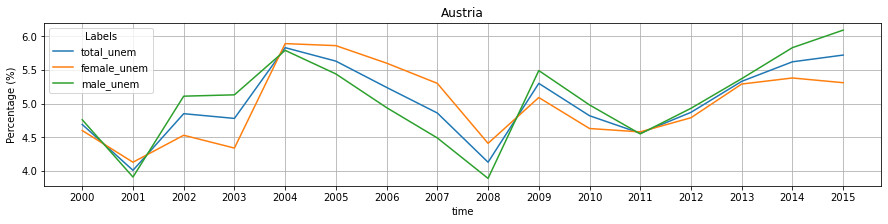

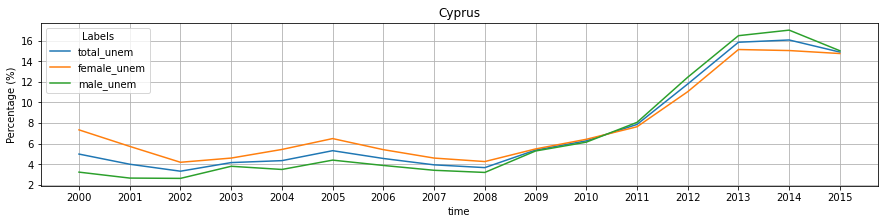

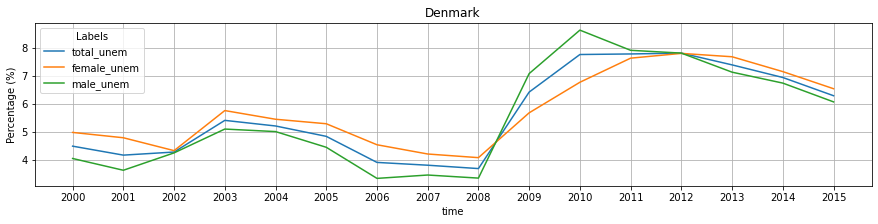

In [9]:
plotme('Austria')
plotme('Cyprus')
plotme('Denmark')

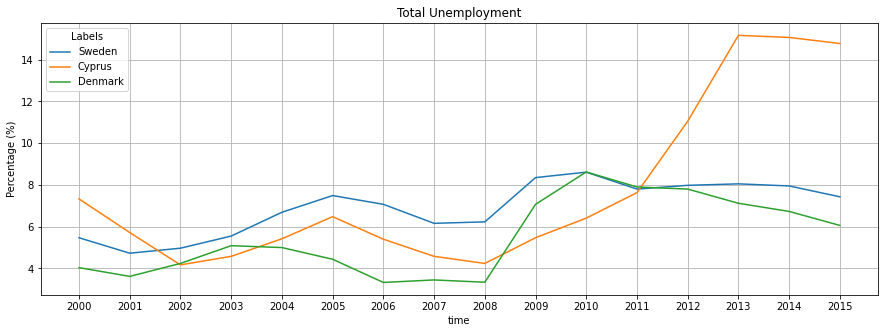

In [10]:
Sweden_df=data[data['country']=='Sweden'].sort_values("year")
Cyprus_df=data[data['country']=='Cyprus'].sort_values("year")
Denmark_df=data[data['country']=='Denmark'].sort_values("year")

t = list(Sweden_df['year'])


unemSweden = list(Sweden_df['total_unem'])
unemCyprus = list(Cyprus_df['female_unem'])
unemDenmark = list(Denmark_df['male_unem'])


# plotting a line plot after changing it's width and height
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(5)

plt.plot(t, unemSweden, label='Sweden')
plt.plot(t, unemCyprus, label='Cyprus')
plt.plot(t, unemDenmark, label='Denmark')
plt.xlabel('time')
plt.ylabel('Percentage (%)')
plt.grid(True)

plt.title('Total Unemployment')
plt.legend(title='Labels')




plt.show()

the corelation of Uneployment and Inflation is -0.09077838103084256


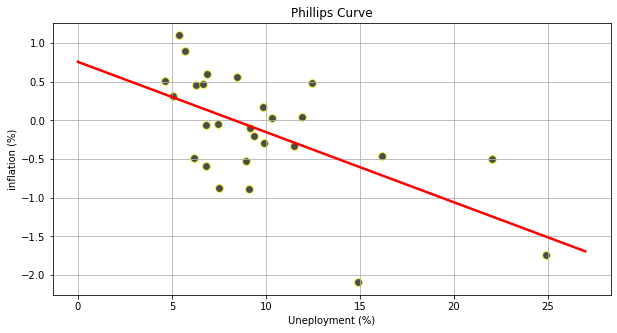

In [11]:
df=data[data['year']=='2015']

x = list(df['total_unem'])
y = list(df['inflation'])


# Initialize layout
fig, ax = plt.subplots(figsize = (10, 5))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="yellow", color='black')

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(0, 27, num=500)
xaxim = np.linspace(0, 0, 27)
ax.grid(visible=True, which='major', axis='both')

ax.set_title(label='Phillips Curve')
ax.set_xlabel(xlabel='Uneployment (%)')
ax.set_ylabel(ylabel='inflation (%)')
# Plot regression line
ax.plot(xseq, a + b * xseq, color="r", lw=2.5);
print(f'the corelation of Uneployment and Inflation is {b}')

In [12]:
def opensite(url):
    # OPEN SITE

    driver = webdriver.Chrome(r"chrome_driver\chromedriver100.exe")
    driver.get(url)

    
    return driver

In [14]:
mapObj=0
for theyear in range (2000,2016):
    
    latitudelongitude = pd.read_csv('latitude_longitude.csv')  
    countries=data['country'].unique()
    mapData=[]
    del mapObj
    thecolumn='inflation'
    latitude=0
    longitude=0
    count=0
    for country in countries[:-3]: 

        examble=data[data['country']==country].sort_values("year")
        examplelocation=latitudelongitude[latitudelongitude['name']==country]
    #     examble_total_unem=examble['total_unem']
    #     examble_female_unem=examble['female_unem']
    #     examble_male_unem=examble['male_unem']
        count+=1

        latitude += list(examplelocation['latitude'])[0]
        longitude += list(examplelocation['longitude'])[0]




        mydata=[
            list(examplelocation['latitude'])[0],
            list(examplelocation['longitude'])[0],
            list(examble[examble['year']== str(theyear)]['inflation'])[0]
        ]

        mapData.append(mydata)

    mapObj = folium.Map(location=[latitude/count, longitude/count], width=750, height=750,tiles='cartodb positron', zoom_start=4)
    mapObj = folium.Map(location=[latitude/count, longitude/count], attr =f'{theyear} {thecolumn}')
    mapObj = folium.Map(location=[latitude/count, longitude/count], zoom_start=4)

    HeatMap(mapData).add_to(mapObj)

    mapObj.save(r"./html/{} {}.html".format(theyear, thecolumn))
    
    

    
    url=r'C:\Users\Admin\Petris\Assignment2\html\{} {}.html'.format(theyear, thecolumn)
    driver =opensite(url)

    #Give the map tiles some time to load
    time.sleep(2)
    driver.save_screenshot(r'images/{} {}.png'.format(theyear, thecolumn))
    driver.quit()
    
    image = Image.open(Path(r'./images/{} {}.png'.format(theyear, thecolumn)))
    font = ImageFont.truetype('arial',35)

    draw = ImageDraw.Draw(image)
    draw.text((100, 100),str(theyear),fill=(0,0,0),font=font)
    image.save(r'images/{} {}.png'.format(theyear, thecolumn))
    

C:\Users\Admin\AppData\Local\Temp/ipykernel_25012/2690417251.py:4: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(r"chrome_driver\chromedriver100.exe")


In [15]:
image_path = Path(r'./images')

images = list(image_path.glob('*.png'))
image_list = []

In [16]:
for file_name in images:
    image_list.append(imageio.imread(file_name))

    
imageio.mimwrite('GifMap.gif', image_list, fps=2)

In [25]:
data.groupby[[]]

,country,year,total_unem,female_unem,male_unem,inflation
0,Austria,2015,5.72,5.31,6.09,0.896563
1,Austria,2014,5.62,5.38,5.83,1.605812
2,Austria,2013,5.33,5.29,5.37,2.000156
3,Austria,2012,4.87,4.79,4.93,2.485676
4,Austria,2011,4.56,4.58,4.55,3.286579
...,...,...,...,...,...,...
427,Sweden,2004,6.69,6.18,7.16,0.373660
428,Sweden,2003,5.55,5.01,6.05,1.925655
429,Sweden,2002,4.97,4.62,5.28,2.158482
430,Sweden,2001,4.73,4.40,5.03,2.405958


In [29]:
data.groupby('year').mean()


,total_unem,female_unem,male_unem,inflation
year,,,,
2000,9.305185,10.199630,8.711852,5.819038
2001,8.958148,9.697037,8.480741,5.069938
2002,8.826667,9.529630,8.371482,3.562091
2003,8.820741,9.549259,8.332593,2.910578
2004,8.901852,9.661111,8.358518,3.165469
2005,8.432222,9.281481,7.812593,2.897719
2006,7.485926,8.399259,6.795926,3.053233
2007,6.521852,7.324444,5.916667,3.513354
2008,6.389630,7.007037,5.922593,5.440216


9.100324065045074

In [30]:
mapObj.show()

AttributeError: 'Map' object has no attribute 'show'